In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('./Downloads/proyect_udacity/calendar.csv')
df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


### Pregunta: Cuales son las epocas mas ocupadas del año para visitar boston? En cuanto aumentan los precios?

In [9]:
df.shape

(1308890, 4)

In [23]:
df.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [25]:
df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

### Limpieza de Signos en la Columna Price y transformación a tipo numerico

In [46]:
df.price = df.price.replace('[$,]', '', regex=True).astype(float)

In [52]:
df.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [54]:
df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


#### Transformacionales de columna Data en datatime

In [57]:
df['date'] = pd.to_datetime(df['date'])

In [63]:
df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

#### Formato manejable de available

In [80]:
df.available.unique()

array(['f', 't'], dtype=object)

In [82]:
df['available'] = df['available'].apply(lambda x: 1 if x == 't' else 0)

In [84]:
df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN
3,12147973,2017-09-02,0,NaN
4,12147973,2017-09-01,0,NaN


#### Crear una columna para identificar la temporada:

In [87]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

In [89]:
df['season'] = df['date'].dt.month.apply(get_season)

In [93]:
df.head()

,listing_id,date,available,price,season
0,12147973,2017-09-05,0,NaN,Fall
1,12147973,2017-09-04,0,NaN,Fall
2,12147973,2017-09-03,0,NaN,Fall
3,12147973,2017-09-02,0,NaN,Fall
4,12147973,2017-09-01,0,NaN,Fall


##### Las temporadas mas ocupadas con la columna available 

In [95]:
# Tasa de ocupacion por temporada
season_occupancy = df.groupby('season')['available'].mean().sort_values(ascending=False)
print(season_occupancy)

season
Winter    0.560786
Summer    0.494844
Spring    0.485472
Fall      0.424824
Name: available, dtype: float64


##### Rellenar valores nulos con los precios de la misma fecha

In [98]:
price_by_date = df.groupby('date')['price'].mean()

In [102]:
df['price'] = df.apply(
    lambda row: price_by_date[row['date']] if pd.isnull(row['price']) else row['price'], axis=1)


In [108]:
df.head()

,listing_id,date,available,price,season
0,12147973,2017-09-05,0,190.804553,Fall
1,12147973,2017-09-04,0,189.907829,Fall
2,12147973,2017-09-03,0,192.566038,Fall
3,12147973,2017-09-02,0,197.997775,Fall
4,12147973,2017-09-01,0,202.046797,Fall


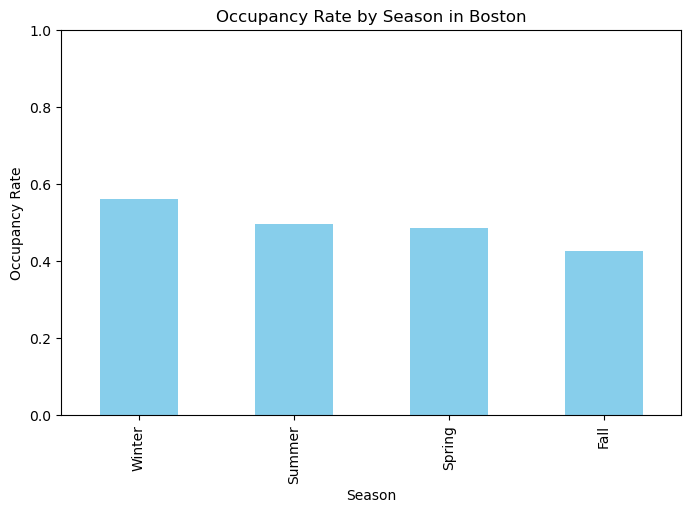

In [116]:
# Graficar tasa de ocupación por temporada
plt.figure(figsize=(8, 5))
season_occupancy.plot(kind='bar', color='skyblue')
plt.title('Occupancy Rate by Season in Boston')
plt.xlabel('Season')
plt.ylabel('Occupancy Rate')
plt.ylim(0, 1)  # La ocupación está en proporciones entre 0 y 1
plt.show()

#### Precio agrupado por temporada

In [120]:
# Agrupar los datos por temporada y calcular la media de los precios
seasonal_avg_prices = df.groupby('season')['price'].mean().sort_values(ascending=False)

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_28982/2713149026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg_prices.index, y=seasonal_avg_prices.values, palette='viridis')


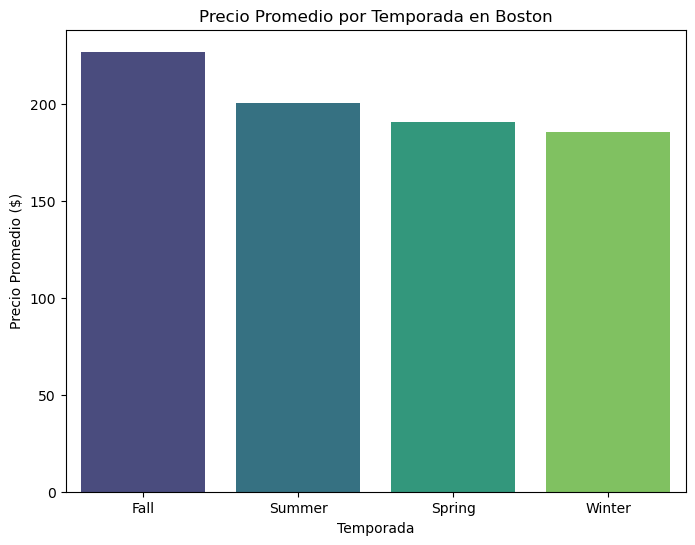

In [122]:
# Graficar los precios promedio por temporada
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_avg_prices.index, y=seasonal_avg_prices.values, palette='viridis')
plt.title('Precio Promedio por Temporada en Boston')
plt.xlabel('Temporada')
plt.ylabel('Precio Promedio ($)')
plt.show()

In [126]:
# Identificar el precio más alto y más bajo
max_price = seasonal_avg_prices.max()
min_price = seasonal_avg_prices.min()

# Incremento porcentual
price_increase = ((max_price - min_price) / min_price) * 100

print(f"Los precios aumentan un {price_increase:.2f}% de la temporada más baja a la más alta.")

Los precios aumentan un 22.38% de la temporada más baja a la más alta.


In [135]:
df.to_csv('boston_airbnb_seasonal_prices.csv', index=False)